ЗАДАНИЕ

1.Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

2.Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

3.Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

4.Проанализируйте CTR с разбивкой по рекламной кампании.

5.Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 

6.Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

7.Посчитайте конверсию из клика в покупку.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import cluster
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
sns.set(
    font_scale = 2, 
    style = "whitegrid", 
    rc = {'figure.figsize':(20,10)})

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-tulnikov-27/STATISTIKA/conversion.csv')

In [4]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [6]:
df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [7]:
fb_Impressions = df.groupby('fb_campaign_id', as_index=False) \
.agg({'Impressions': 'sum'})

In [8]:
fb_Impressions['log_Impressions'] = np.log(fb_Impressions.Impressions)

In [9]:
fb_Impressions.head()

,fb_campaign_id,Impressions,log_Impressions
0,103916,7350,8.902456
1,103917,17861,9.790375
2,103920,693,6.541030
3,103928,8392,9.035034
4,103929,1915,7.557473


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


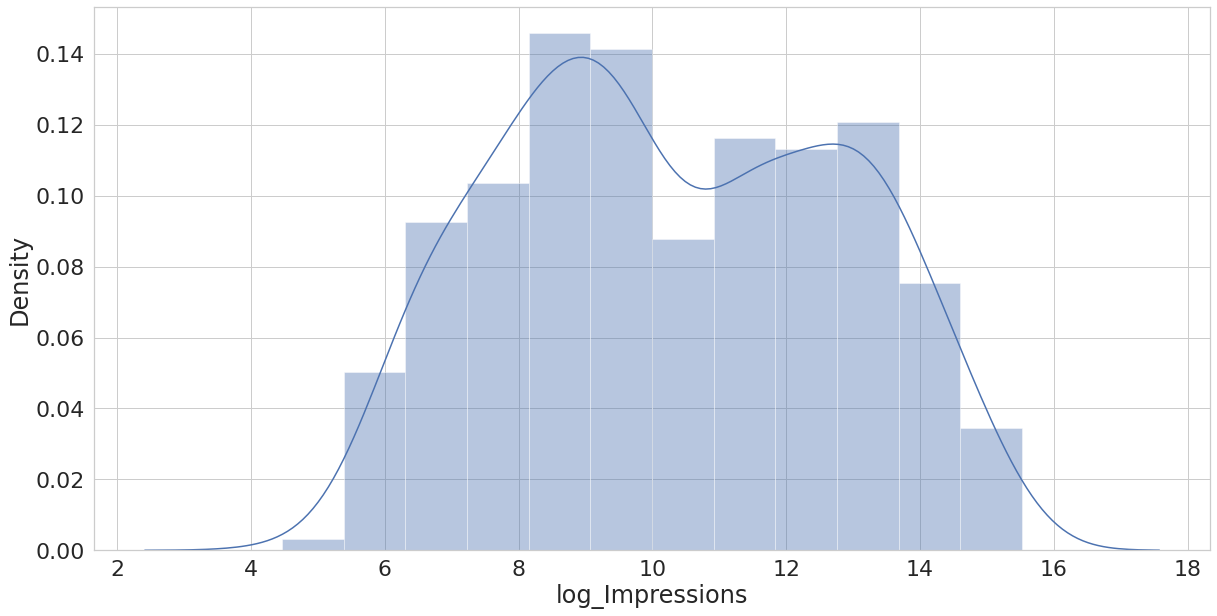

In [10]:
sns.distplot(fb_Impressions['log_Impressions'])

In [11]:
#Теперь посчитаем ещё несколько полезных метрик. 
#Первая – CTR (click-through rate), которая показывает кликабельность, 
#т.е. отношение числа кликов к количеству показов.

In [12]:
df['CTR'] = df.Clicks / df.Impressions

In [13]:
df.sort_values('CTR', ascending=False).head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


In [14]:
#Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 
#Какому графику соответствует распределение CTR кампании 916?

In [15]:
campaign_id_916 = df.query('xyz_campaign_id == 916')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


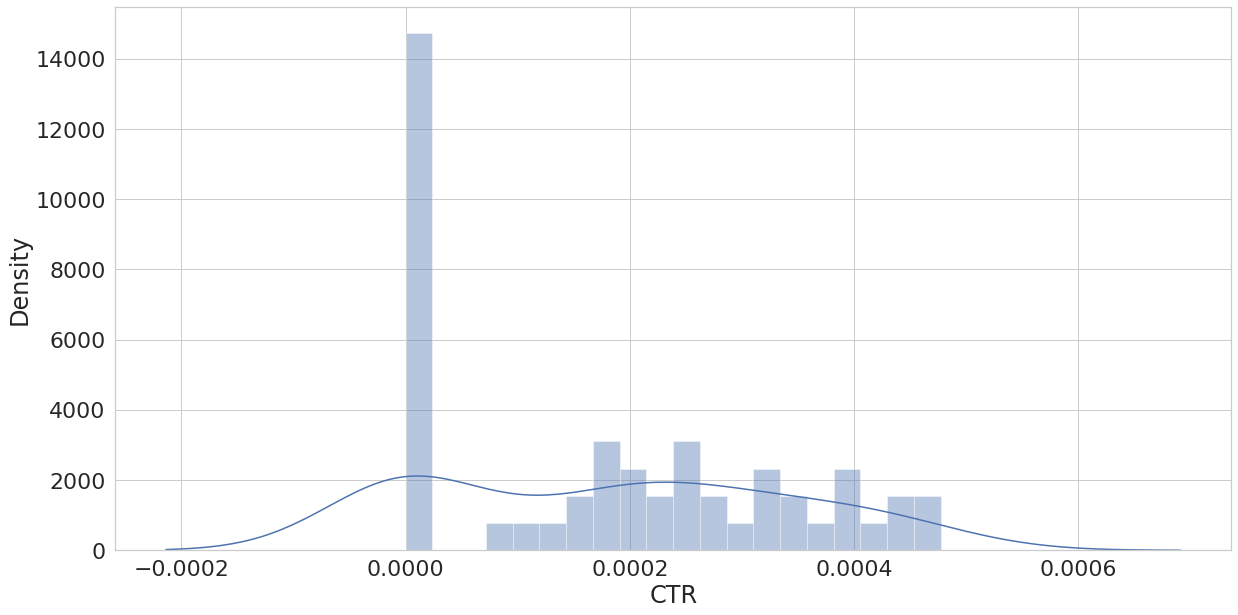

In [16]:
sns.distplot(campaign_id_916['CTR'], bins = 20)

In [17]:
df['CPC'] = df.Spent / df.Clicks

In [18]:
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [19]:
(1.644364 - 1.390000)

0.25436400000000003

In [20]:
from scipy.stats import iqr

In [21]:
iqr(df.CPC, nan_policy = 'omit').round(2)

0.25

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


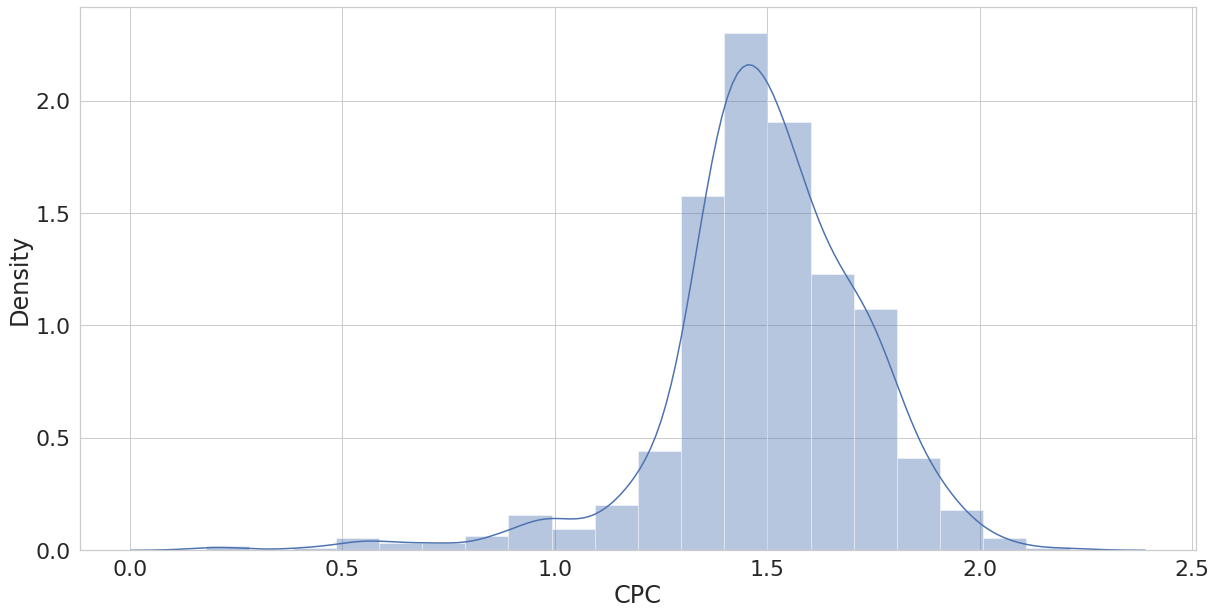

In [22]:
sns.distplot(df['CPC'], bins = 20)

#Визуализируйте CPC с разбивкой по полу пользователей, 
#которым были показаны объявления.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


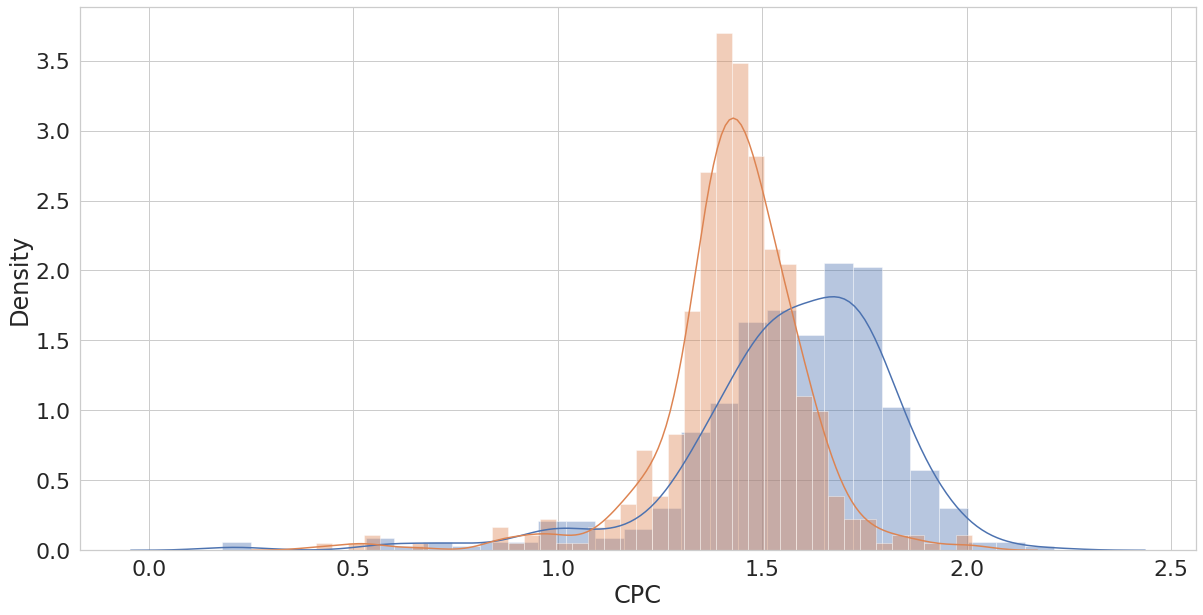

In [24]:
sns.distplot(df.query("gender=='M'").CPC.dropna(), label='M')
sns.distplot(df.query("gender=='F'").CPC.dropna(), label='F')

In [27]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,100.0


В качестве ответа укажите конверсию для объявления 1121814 в процентах

In [33]:
df['CR'] = ((df.Approved_Conversion / df.Clicks) * 100).round(2)

In [34]:
df.query('ad_id == 1121814')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.09
